## **Text Detection and OCR on Screenshots**

Uses the **EasyOCR** module.

The EasyOCR package is created and maintained by Jaided AI, a company that specializes in Optical Character Recognition services.

EasyOCR is implemented using Python and the PyTorch library. 

**NOTE:** If in **Colab** go to Edit -> Notebook settings and Change Hardware Accelerator to GPU for much faster inference. 

EasyOCR can OCR text in 58 languages, including English, German, Hindi, Russian, and more! 

#### **Import Modules, Install EasyOCR and download sample image**

In [1]:
!pip install easyocr
!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/whatsapp_conv.jpeg

# import the necessary packages
from matplotlib import pyplot as plt
from easyocr import Reader
import pandas as pd
import argparse
import cv2
import time

     |████████████████████████████████| 57.2MB 87kB/s 
--2020-12-19 15:51:58--  https://github.com/rajeevratan84/ModernComputerVision/raw/main/whatsapp_conv.jpeg
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/whatsapp_conv.jpeg [following]
--2020-12-19 15:51:58--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/whatsapp_conv.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91841 (90K) [image/jpeg]
Saving to: ‘whatsapp_conv.jpeg’

whatsapp_conv.jpeg  100%[===================>]  89.69K  --.-KB/s    in 0.004s  

2020-12-19 15:51:58 (

### **Our image displaying function**

In [2]:
def imgshow(title="", image = None, size = 6):
    if image.any():
      w, h = image.shape[0], image.shape[1]
      aspect_ratio = w/h
      plt.figure(figsize=(size * aspect_ratio,size))
      plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      plt.title(title)
      plt.show()
    else:
      print("Image not found")

### **Detect Text in Image and Show our Input Image**

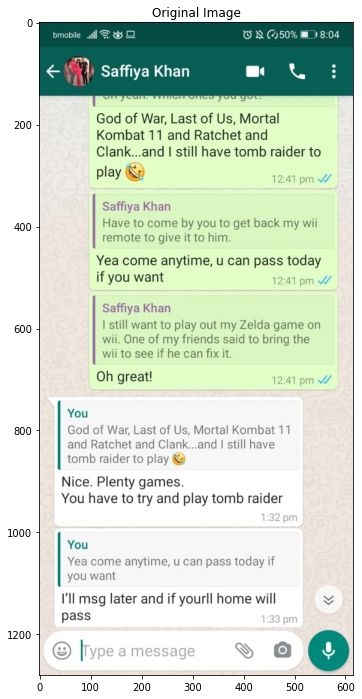

Detecting and OCR'ing text from input image...


Completed in 3.255537509918213 seconds


In [3]:
# load the input image from disk
image = cv2.imread("whatsapp_conv.jpeg")
imgshow("Original Image", image, size = 12)

# OCR the input image using EasyOCR
print("Detecting and OCR'ing text from input image...")
reader = Reader(['en'], gpu = True)

ts = time.time()
results = reader.readtext(image)
te = time.time()
td = te - ts
print(f'Completed in {td} seconds')

### **Display Text Overlaid onto our Image**

 Probability of Text: 0.401% OCR'd Text: bmobile ,lll=oE
 Probability of Text: 7.318% OCR'd Text: 0 4 (,50%
 Probability of Text: 56.175% OCR'd Text: 8:04
 Probability of Text: 37.880% OCR'd Text: Saffiya Khan
 Probability of Text: 98.782% OCR'd Text: War,
 Probability of Text: 56.906% OCR'd Text: Last of Us, Mortal
 Probability of Text: 88.713% OCR'd Text: God of
 Probability of Text: 14.001% OCR'd Text: Kombat 11 and Ratchet and
 Probability of Text: 19.240% OCR'd Text: still have tomb raider to
 Probability of Text: 44.688% OCR'd Text: Clank.. and
 Probability of Text: 97.018% OCR'd Text: play
 Probability of Text: 42.005% OCR'd Text: 12:41 pm
 Probability of Text: 53.503% OCR'd Text: Saffiya Khan
 Probability of Text: 6.553% OCR'd Text: Have to come byyou to get back mywii
 Probability of Text: 31.828% OCR'd Text: remote to give it to him.
 Probability of Text: 12.136% OCR'd Text: Yea come anytime, u can pass today
 Probability of Text: 60.859% OCR'd Text: if you want
 Probability 

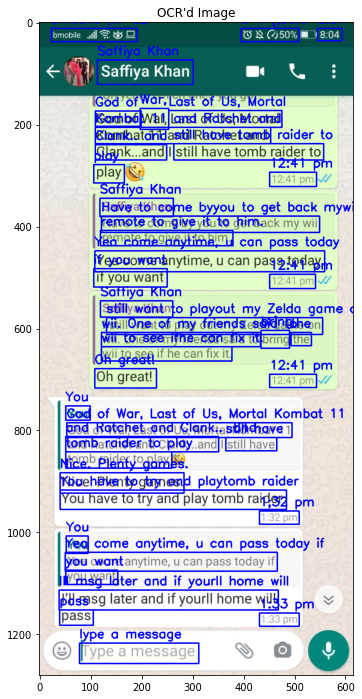

In [5]:
all_text = []

# iterate over our extracted text 
for (bbox, text, prob) in results:
    # display the OCR'd text and the associated probability of it being text
    print(f" Probability of Text: {prob*100:.3f}% OCR'd Text: {text}")

    # get the bounding box coordinates
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))

    # Remove non-ASCII characters from the text so that
    # we can draw the box surrounding the text overlaid onto the original image
    text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
    all_text.append(text)
    cv2.rectangle(image, tl, br, (255, 0, 0), 2)
    cv2.putText(image, text, (tl[0], tl[1] - 10),
      cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

# show the output image
imgshow("OCR'd Image", image, size = 12)

In [7]:
long_str = ' '.join(all_text)
long_str

'bmobile ,lll=oE 0 4 (,50% 8:04 Saffiya Khan War, Last of Us, Mortal God of Kombat 11 and Ratchet and still have tomb raider to Clank.. and play 12:41 pm Saffiya Khan Have to come byyou to get back mywii remote to give it to him. Yea come anytime, u can pass today if you want 12:41 pm Saffiya Khan still want to playout my Zelda game on bring wii. One of my friends said to the wii to see ifhe can fix it. Oh great! 12:41 pm You God of War, Last of Us, Mortal Kombat 11 and Ratchet and Clank.. .and still have tomb raider to play Nice. Plenty games. You have to try and playtomb raider 1;32 pm You Yea come anytime, u can pass today if you want III msg later and if yourll home will pass 1:33 pm lype a message'

In [37]:
from matplotlib import pyplot as plt
from easyocr import Reader
import pandas as pd
import argparse
import cv2
import time

class getScreenShotText:
  def __init__(self):
    self.image = None
    self.results = None
    self.reader = self.getReader()

  def getReader(self):
    return Reader(['en'], gpu = True)

  def getScreenshotText(self, path):
    print('Processsing Image...')
    self.image = self.readImage(path)
    ts = time.time()
    self.results = reader.readtext(self.image)
    te = time.time()
    td = te - ts
    print(f'Completed in {td} seconds')
    return self._getText()

  def _getText(self):
    for (bbox, text, prob) in self.results:
      text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
      all_text.append(text)
        
    return ' '.join(all_text)

  def getImageOverlay(self):
    for (bbox, text, prob) in self.results:

      # get the bounding box coordinates
      (tl, tr, br, bl) = bbox
      tl = (int(tl[0]), int(tl[1]))
      tr = (int(tr[0]), int(tr[1]))
      br = (int(br[0]), int(br[1]))
      bl = (int(bl[0]), int(bl[1]))

      # Remove non-ASCII characters from the text so that
      # we can draw the box surrounding the text overlaid onto the original image
      text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
      all_text.append(text)

      cv2.rectangle(image, tl, br, (255, 0, 0), 2)
      cv2.putText(image, text, (tl[0], tl[1] - 10),
        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)
        
    return image

  def readImage(self, path):
      self.image = cv2.imread(path)
      return self.image

  def imgshow(self, title="", image = None, size = 6):
      if image.any():
        w, h = image.shape[0], image.shape[1]
        aspect_ratio = w/h
        plt.figure(figsize=(size * aspect_ratio,size))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.show()
      else:
        print("Image not found")

In [38]:
gsst = getScreenShotText()
raw_text = gsst.getScreenshotText("whatsapp_conv.jpeg")
print(raw_text)

Processsing Image...
Completed in 3.0143320560455322 seconds
bmobile ,lll=oE 0 4 (,50% 8:04 Saffiya Khan War, Last of Us, Mortal God of Kombat 11 and Ratchet and still have tomb raider to Clank.. and play 12:41 pm Saffiya Khan Have to come byyou to get back mywii remote to give it to him. Yea come anytime, u can pass today if you want 12:41 pm Saffiya Khan still want to playout my Zelda game on bring wii. One of my friends said to the wii to see ifhe can fix it. Oh great! 12:41 pm You God of War, Last of Us, Mortal Kombat 11 and Ratchet and Clank.. .and still have tomb raider to play Nice. Plenty games. You have to try and playtomb raider 1;32 pm You Yea come anytime, u can pass today if you want III msg later and if yourll home will pass 1:33 pm lype a message bmobile ,lll=oE 0 4 (,50% 8:04 Saffiya Khan War, Last of Us, Mortal God of Kombat 11 and Ratchet and still have tomb raider to Clank.. and play 12:41 pm Saffiya Khan Have to come byyou to get back mywii remote to give it to him.

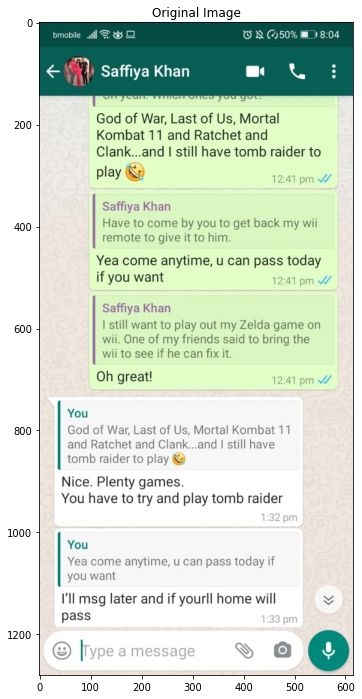

In [39]:
image = gsst.readImage("whatsapp_conv.jpeg")
gsst.imgshow("Original Image", image, size = 12)

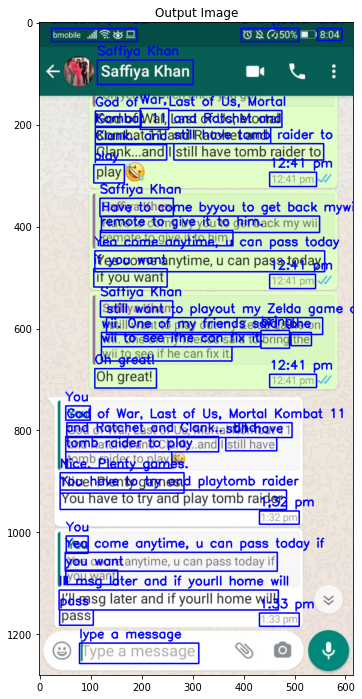

In [41]:
output_image = gsst.getImageOverlay()
gsst.imgshow("Output Image", output_image, size = 12)